In [1]:
import torch
from torchvision import transforms
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
torch.set_default_device('cuda')

In [3]:
MAX_T = 1000
BETA_START = 1e-4
BETA_END = 0.02
DEVICE = 'cuda'

In [4]:
def alpha(timesteps):
    """ return alpha_t, \bar{alpha_t}
    """
    alphas = 1 - torch.linspace(BETA_START, BETA_END, MAX_T)[:timesteps]
    return alphas[-1], torch.prod(alphas)

In [5]:
model = torch.load("./weights/epoch_5.pth")
model.eval()
pass

In [6]:
timesteps = torch.arange(1000, 0, -1, device='cuda')[:, None]
print(timesteps.shape)

torch.Size([1000, 1])


In [9]:
picture_list = []
x = torch.randn((1, 3, 256, 256))
ori_pic = transforms.ToPILImage()(x.squeeze())
with torch.no_grad():
    for t in tqdm(timesteps):
        a, bar_a = alpha(t)
        z = torch.randn((1, 3, 256, 256))
        x = (1/torch.sqrt(a)) * (x - ((1-a)/(torch.sqrt(1-bar_a))) * model(x, t)) + torch.sqrt(1-a) * z
        picture_list.append(transforms.ToPILImage()(x.squeeze()))

100%|██████████| 1000/1000 [00:19<00:00, 51.26it/s]


1000


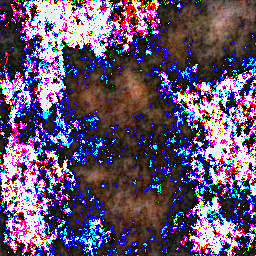

In [13]:
print(len(picture_list))
display(picture_list[-1])

In [10]:
ori_pic.save("out.gif", save_all=True, append_images=picture_list)